# Neural Network Analysis
# MLP_ Multilayer Perceptron 

**Artificial neural networks** (**ANNs**) are computing systems vaguely inspired by the **biological neural networks** that constitute animal brains.

An ANN is based on a collection of connected units or nodes called **artificial neurons**, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons.

A **multilayer perceptron** (**MLP**) is a class of feedforward **artificial neural network** (**ANN**).

## Index

1. [Import_Libraries](#1_Import_Libraries)



2. [Model_MLPC_Functions](#2_Model_MLPC_Functions)
    
   2.1 [Train_Test_Split](#2.1_Train_Test_Split)
   
   2.2 [GridSearch](#2.2_GridSearch)
   
   2.3 [Evaluation_Test_Function](#2.3_Evaluation_Test_Function)
   
   2.4 [Confusion_Matrix](#2.4_Confusion_Matrix)   



3. [MLPC](#MLPC)

   3.1 [MLPC_not_incl_LDA](#3.1_MLPC_not_incl_LDA)
   
      - Train/Test (90/10)
      - Grid Search
      - Model 
      - Accuracy
      - Classification report
      - Confusion Matrix 
      - Conclusions
    
   3.2 [MLPC_incl_LDA](#3.2_MLPC_incl_LDA)
   
      - Train/Test (90/10)
      - Grid Search
      - Model 
      - Accuracy
      - Classification report
      - Confusion Matrix 
      - Conclusions
   
   3.3 [MLPC_Resampled_Data(SMOTEtomek)](#3.3_MLPC_Resampled_Data(SMOTEtomek))
   
      - Unbalanced Data (90/10)
      - Train/Test
      - Grid Search
      - Model 
      - Accuracy
      - Classification report
      - Confusion Matrix 
      - Conclusions



4. [MLPC_Conclusions](#4_MLPC_Conclusions)

   4.1 [Cross_Validation_MLPC](#4.1_Cross_Validation_MLPC)



5. [Recap](#5_Recap)

______

### 1_Import_Libraries

In [1]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,6)

# Umbalance Data Viz
from sklearn.manifold import TSNE

# Umbalance Data
from collections import Counter
# Under-sampling
from imblearn.under_sampling import NearMiss
# Over-sampling
from imblearn.over_sampling import SMOTE
# Under/Over-sampling
from imblearn.combine import SMOTETomek


# Train/Test
from sklearn.model_selection import train_test_split

# Neural Network (Multilayer Perceptron)
from sklearn.neural_network import MLPClassifier

# Grid search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import math

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#### Data Normalized

In [2]:
churn_norm = pd.read_csv("Churn_Norm.csv")
churn_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0


In [3]:
# Variables
X_norm = churn_norm.drop(['Exited'],axis=1)
# Target
y_norm = pd.DataFrame(churn_norm['Exited'])

#### Data Normalized+LDA

This dataset contains an additional column with the results of the LDA (notebook: `PCA and LDA`)

In [4]:
churn_norm_LDA = pd.read_csv("Churn_Norm_LDA.csv")
churn_norm_LDA.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,PC1
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0,-0.244017
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0,-0.036741
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.868267
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0,0.388012
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0,-0.021615


In [5]:
# Variables
X_norm_LDA = churn_norm_LDA.drop(['Exited'],axis=1)
# Target
y_norm_LDA = pd.DataFrame(churn_norm_LDA['Exited'])

### 2_Model_MLPC_Functions

### 2.1_Train_Test_Split

In [6]:
def train_test(X, y, test_size, stratify):    
    
    '''
    Function that returns train and test data
    '''
    
    # Train/Test (90/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=stratify)
    
    return X_train, X_test, y_train, y_test

In [7]:
# split= train_test(X=X_norm, y=y_norm, test_size=0.1, stratify=y_norm)

### 2.2_GridSearch

Using **GridSearch** you can find the **best parameters** for a **classifier**. 

#### Parameters

- **solver**: The solver for weight optimization.
    - **lbfgs** is an optimizer in the family of quasi-Newton methods.
    - **sgd** refers to stochastic gradient descent.
    - **adam** refers to a stochastic gradient-based optimizer.
    
    
- **activation**: Activation function for the hidden layer.
    - **logistic**, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    - **tanh**, the hyperbolic tan function, returns f(x) = tanh(x).
    - **relu**, the rectified linear unit function, returns f(x) = max(0, x)
    

- **max_iter**: Maximum number of iterations. The solver iterates until convergence (determined by `tol`) or this number of iterations. For stochastic solvers (sgd,  adam), this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
               
- **alpha**: L2 penalty (regularization term) parameter.

- **hidden_layer_sizes**: The ith element represents the number of neurons in the ith hidden layer.

#### Number of hidden layers

Research Article: `Review on Methods to Fix Number of Hidden Neurons in Neural Networks` (K. Gnana Sheelaand S. N. Deepa)
                  https://www.hindawi.com/journals/mpe/2013/425740/

According to this research article the number of neurons can be calculated in a hidden layer as:

$$hidden layers = \frac{(4n^2+3)}{(n^2-8)}$$

where n is the number of input.

In [8]:
def grid_search(model, X_train, y_train, name):
    
    '''
    Function that find the best parameters by using GridSearch
    '''
    
    # Number of hidden layers
    numb_input = len(X_train.columns)
    hidden_layers = (4*numb_input**2+3)/(numb_input**2-8)
    numb_hidden_layers = math.ceil(hidden_layers )
    
    # Parameter MLPClassifier
    parameters = {'solver': ['lbfgs' 'sgd', 'adam'], 
                  'activation': ['logistic','relu','tanh'],
                  'max_iter': [1500,2000,5000], 
                  'alpha': 10.0 ** -np.arange(1, 4),
                  'hidden_layer_sizes':np.arange(2,numb_hidden_layers),
                  'random_state':[0,1,42]}
    
    # Grid search
    # n_jobs: Number of jobs to run in parallel.
    model_grid = GridSearchCV(model, parameters, n_jobs=-1)    
    model_grid.fit(X_train, y_train.values.ravel())
    
    name = name 
    best_score = model_grid.best_score_
    best_parameters = model_grid.best_params_
    
    print(f"----------------------------------{name}-------------------------------------")
    print(f"Best score: {round(best_score*100,3)}%")
    print("Parameters:")
    print(best_parameters)
    
    return model_grid.best_params_

### 2.3_Evaluation_Test_Function

#### Metrics for Evaluation

- **Accuracy** tells you what percentage of the predictions are correct.
- **Precision** tells us the following: from the positive predictions I have made, what percentage are positive.
- **Recall** (opposed to precision), is useful when the cost of a false negative is high. It tells us: of all the positive predictions, what percentage confirms the predicition.
- **F1-score** seeks a balance between precision and recall.

#### Target

Predict how many customers want to leave the bank.

In [9]:
def model_evaluation(X_train, X_test, y_train, y_test, model):
    
    '''
    Function that returns the accuracy of the model
    '''
    
    # Fit/Predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Train Accuracy
    train_accuracy = round(model.score(X_train, y_train) * 100, 2)  
    # Test Accuracy
    test_accuracy = round(model.score(X_test, y_test) * 100, 2)
        
    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Parameters
    scoring = {'accuracy': accuracy_score(y_test,y_pred),
               'precision': precision_score(y_test,y_pred),
               'recall': recall_score(y_test,y_pred),
               'f1': f1_score(y_test,y_pred)}
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Validation Score
    # scoring: recall (our target are customers that want to leave the bank.)
    scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(), scoring = 'recall')
    
    return train_accuracy, test_accuracy, cr, cm, scores

### 2.4_Confusion_Matrix

A **confusion matrix**, also known as an **error matrix**, is a specific table layout that allows visualization of the performance of an algorithm.

In [10]:
def confusion_matrix_results(model):
    
    '''
    Function that returns:
    - Viz of the confusion matrix
    - Results of the confusion matrix
    '''
        
    print(f'Confusion Matrix')
    cm = model[3]
    print(f'{cm}')

    print(45*'-')
    
    # Viz
    plt.clf()
    plt.figure(figsize=(8,6))
    res = sns.heatmap(cm, annot=True, vmin=0.0, vmax=1000, fmt='.1f', cmap='viridis_r', alpha = 0.5)

    plt.xticks([0.5,1.5], ['Churn', 'Not Churn'], va='center')
    plt.yticks([0.5,1.5], ['Churn', 'Churn'], va='center')
    plt.xlabel('PREDICT VALUES', fontsize=10)
    plt.ylabel('TEST VALUES', fontsize=10)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()
    
    print(45*'-')

    # Results
    print(f'T0 (True Not Churn): {cm[0][0]} ({round(cm[0][0]*100/sum(cm[0]),2)}%)')
    print(f'F0 (False Not Churn): {cm[1][0]} ({round(cm[1][0]*100/sum(cm[1]),2)}%)')
    
    print(f'T1 (True Churn): {cm[1][1]} ({round(cm[1][1]*100/sum(cm[1]),2)}%)')
    print(f'F1 (False Churn): {cm[0][1]} ({round(cm[0][1]*100/sum(cm[0]),2)}%)')

### 3_MLPC

In this project we will use the **recall** as a comparison parameter between the different models because in this case the **cost of a false negative** (not being able to predict the people who have left the bank) is **high**.

$$recall = \frac{True Churn(T1)}{True Churn(T1)+False Not Churn(F0)}$$

### 3.1_MLPC_not_incl_LDA

#### Train/Test (90/10)

In [11]:
# Train/Test (90/10)
X_tr_norm, X_te_norm, y_tr_norm, y_te_norm = train_test(X=X_norm, y=y_norm, test_size=0.1, stratify=y_norm)

#### Grid Search

In [12]:
gs_norm = grid_search(MLPClassifier(), X_tr_norm, y_tr_norm, 'MLPC_not_incl_LDA')

----------------------------------MLPC_not_incl_LDA-------------------------------------
Best score: 85.867%
Parameters:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 4, 'max_iter': 1500, 'random_state': 42, 'solver': 'adam'}


#### Model

In [13]:
mlpc = model_evaluation(X_tr_norm, X_te_norm, 
                        y_tr_norm.values.ravel(), y_te_norm.values.ravel(), 
                        model=MLPClassifier(**gs_norm))

#### Accuracy

In [14]:
print(f'TRAIN accuracy: {mlpc[0]} %')
print(f'TEST accuracy_norm: {mlpc[1]} %')

TRAIN accuracy: 85.97 %
TEST accuracy_norm: 87.2 %


#### Classification Report

In [15]:
print(f'Classification Report')
print(f'{mlpc[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       796
         1.0       0.82      0.48      0.60       204

    accuracy                           0.87      1000
   macro avg       0.85      0.73      0.76      1000
weighted avg       0.87      0.87      0.86      1000



#### Confusion Matrix

A **confusion matrix** tells us the performance of our algorithm or test, where the rows are the actual data and the columns the predictions (or vice versa).

Confusion Matrix
[[774  22]
 [106  98]]
---------------------------------------------


<Figure size 432x288 with 0 Axes>

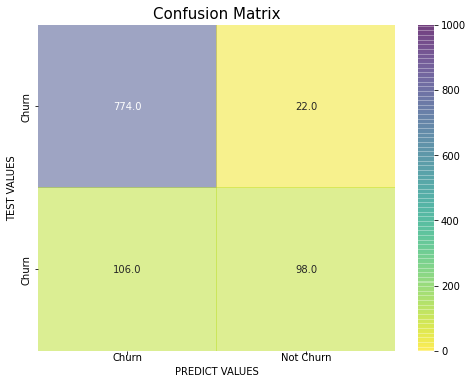

---------------------------------------------
T0 (True Not Churn): 774 (97.24%)
F0 (False Not Churn): 106 (51.96%)
T1 (True Churn): 98 (48.04%)
F1 (False Churn): 22 (2.76%)


In [16]:
recap_cm = confusion_matrix_results(mlpc)

### Conclusions MLPC_not_incl_LDA
We can see that the **MLPC classifier** with normalized data **struggled at predicting the clients that churned/exited the bank** (the target that interests us most).

### 3.2_MLPC_incl_LDA

#### Train/Test (90/10)

In [17]:
X_tr_norm_LDA, X_te_norm_LDA, y_tr_norm_LDA, y_te_norm_LDA = train_test(X=X_norm_LDA, y=y_norm_LDA, test_size=0.1, stratify=y_norm_LDA)

#### Grid Search

In [18]:
gs_norm_LDA = grid_search(MLPClassifier(), X_tr_norm_LDA, y_tr_norm_LDA, 'MLPC_incl_LDA')

----------------------------------MLPC_incl_LDA-------------------------------------
Best score: 85.944%
Parameters:
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': 4, 'max_iter': 1500, 'random_state': 1, 'solver': 'adam'}


#### Model

In [19]:
mlpc_LDA = model_evaluation(X_tr_norm_LDA, X_te_norm_LDA, 
                            y_tr_norm_LDA.values.ravel(), y_te_norm_LDA.values.ravel(), 
                            model=MLPClassifier(**gs_norm_LDA))

#### Accuracy

In [20]:
print(f'TRAIN accuracy: {mlpc_LDA[0]} %')
print(f'TEST accuracy_norm: {mlpc_LDA[1]} %')

TRAIN accuracy: 86.01 %
TEST accuracy_norm: 86.8 %


#### Classification Report

In [21]:
print(f'Classification Report')
print(f'{mlpc_LDA[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       796
         1.0       0.76      0.52      0.62       204

    accuracy                           0.87      1000
   macro avg       0.82      0.74      0.77      1000
weighted avg       0.86      0.87      0.86      1000



#### Confusion Matrix

Confusion Matrix
[[762  34]
 [ 98 106]]
---------------------------------------------


<Figure size 432x288 with 0 Axes>

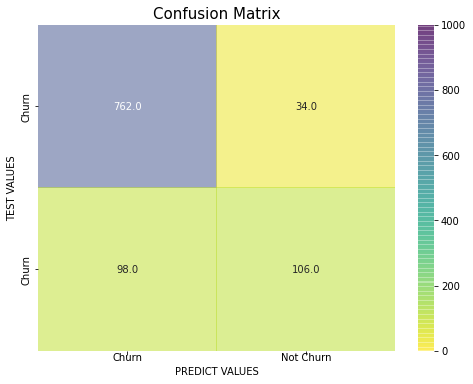

---------------------------------------------
T0 (True Not Churn): 762 (95.73%)
F0 (False Not Churn): 98 (48.04%)
T1 (True Churn): 106 (51.96%)
F1 (False Churn): 34 (4.27%)


In [22]:
recap_cm_LDA = confusion_matrix_results(mlpc_LDA)

### Conclusions MLPC_incl_LDA
We can see that **adding LDA** to the original dataset does not improve the performance of the MLPC classifier but actually makes it **worse**.

### 3.3_MLPC_Resampled_Data(SMOTEtomek)

### Unbalance Data

We use the `Churn_Norm_LDA.csv` dataset to extimate how much is the dataset unbalanced (percentage of churn (Exit clients) / No churn (Not Exited Clients)).

In [23]:
churn = churn_norm_LDA["Exited"].value_counts()[0]
no_churn = churn_norm_LDA["Exited"].value_counts()[1]
perc_churn = round(churn*100/len(churn_norm_LDA),2)
perc_no_churn = round(no_churn*100/len(churn_norm_LDA),2)

print(f'Distribuition f the clients: {perc_churn}% Churn, {perc_no_churn}% No Churn. The dataset is unbalanced.')

Distribuition f the clients: 79.63% Churn, 20.37% No Churn. The dataset is unbalanced.


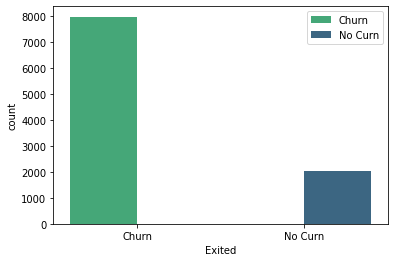

In [24]:
# Viz Exited/Not exited clients
plt.figure(figsize = (6,4))
ax = sns.countplot(x=churn_norm_LDA["Exited"],hue=churn_norm_LDA["Exited"],palette="viridis_r");

exited = ["Churn", "No Curn"]

ax.set_xticklabels(exited)
ax.legend(exited) 
plt.show()

#### TSNE t-distributed Stochastic Neighbor Embedding

**TSNE** t-distributed Stochastic Neighbor Embedding

In [25]:
X_embedded = TSNE(n_components=2).fit_transform(X_norm_LDA)
X_embedded.shape

(10000, 2)

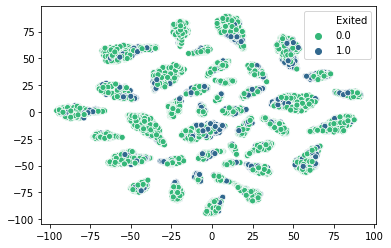

In [26]:
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1], hue=churn_norm_LDA['Exited'], palette='viridis_r');

There is no clear separation between the two groups.

#### Function Resampling

In [27]:
def resampling_df (df, target, scaler):
    
    """
    Function that returns:
    - Resampled dataset
    - TSNE
    """
    
    X = df.drop(target, axis = 1)
    y = df[target]
    
    # Train/Test split (90/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0, stratify=y)
    # Scaler
    X_res, y_res = scaler.fit_sample(X_train, y_train.ravel())
    
    # Count new values
    count = Counter(y_res)
    print(f'Original dataset shape: {Counter(y_train)}')
    print(f'Resampled dataset shape: {Counter(y_res)}')
          
    # TSNE
    X_embedded = TSNE(n_components=2).fit_transform(X_res)

    # Viz distribution
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_res, palette='viridis')
    plt.legend(loc='best')
    plt.show()
    
    df_red = pd.DataFrame(X_res, columns = df.columns)
    df_red[target] = y_res
    
    return df_red

#### Under-Sampling

**Near Miss** is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples.

- **NearMiss-1**: Majority class examples with minimum average distance to three closest minority class examples.

Original dataset shape: Counter({0.0: 7167, 1.0: 1833})
Resampled dataset shape: Counter({0.0: 1833, 1.0: 1833})


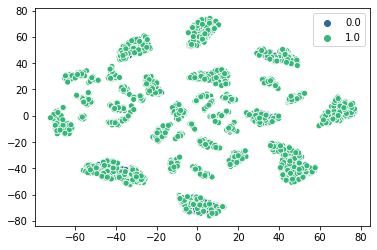

In [28]:
nm_1 = resampling_df (churn_norm_LDA, "Exited", NearMiss(version=1))

#### Over-Sampling

**SMOTE** is an oversampling method that synthesizes new plausible examples in the majority class.

Original dataset shape: Counter({0.0: 7167, 1.0: 1833})
Resampled dataset shape: Counter({0.0: 7167, 1.0: 7167})


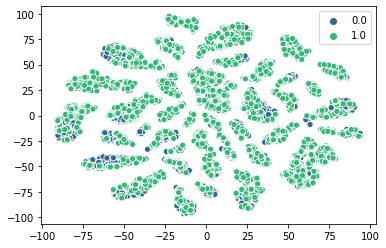

In [29]:
smote = resampling_df (churn_norm_LDA, "Exited", SMOTE(random_state = 2))

#### Combine Sampling Technique

**SMOTEtomek** is a combination of **SMOTE** and **Tomek Links** to balance our data.

- **SMOTE** is an oversampling method that synthesizes new plausible examples in the majority class.

- **Tomek Links** is an undersampling method that remove unwanted overlap between classes where majority class links are removed until all minimally distanced nearest neighbor pairs are of the same class.

Original dataset shape: Counter({0.0: 7167, 1.0: 1833})
Resampled dataset shape: Counter({0.0: 7034, 1.0: 7034})


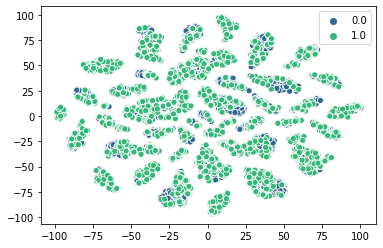

In [30]:
smote_tomek = resampling_df (churn_norm_LDA, "Exited", SMOTETomek())

Resampling techniques tested are not able to separate targets into two groups in a two-dimensional problem.

Even if all the resampling techniques are similar, we consider that the most effective one is: **SMOTEtomek**

In [31]:
smote_tomek.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,PC1
0,0.620,0.067568,0.6,0.661904,0.333333,0.0,0.0,0.452459,0.0,1.0,1.0,0.0,1.0,0.344164
1,0.554,0.256757,0.7,0.587336,0.000000,1.0,1.0,0.665165,0.0,1.0,1.0,0.0,1.0,0.508549
2,0.522,0.472973,0.7,0.000000,0.333333,0.0,1.0,0.782494,1.0,1.0,0.0,0.0,0.0,0.494905
3,0.672,0.391892,0.5,0.681296,0.000000,1.0,0.0,0.865924,1.0,1.0,1.0,0.0,1.0,2.311285
4,1.000,0.175676,0.6,0.526097,0.333333,1.0,1.0,0.893765,0.0,0.0,0.0,0.0,1.0,-1.591473


In [32]:
# Dimensions
print(f'Original dataset rows: {len(churn_norm_LDA)}')
print(f'Resampled dataset rows: {len(smote_tomek)}')

Original dataset rows: 10000
Resampled dataset rows: 14068


In [33]:
# Variables
X_smote_tomek = smote_tomek.drop(['Exited'],axis=1)
# Target
y_smote_tomek = pd.DataFrame(smote_tomek['Exited'])

#### Train_Test (90/10)

In [34]:
X_tr_smote_tomek, X_te_smote_tomek, y_tr_smote_tomek, y_te_smote_tomek = train_test(X=X_smote_tomek, y=y_smote_tomek, test_size=0.1, stratify=y_smote_tomek)

#### Grid Search

In [35]:
gs_norm_smote_tomek = grid_search(MLPClassifier(), X_tr_smote_tomek, y_tr_smote_tomek, 'MLPC_Resampled_Data (SMOTEtomek)')

----------------------------------MLPC_Resampled_Data (SMOTEtomek)-------------------------------------
Best score: 76.669%
Parameters:
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': 3, 'max_iter': 1500, 'random_state': 42, 'solver': 'adam'}


#### Model

In [36]:
mlpc_smote_tomek = model_evaluation(X_tr_smote_tomek, X_te_smote_tomek, 
                                    y_tr_smote_tomek.values.ravel(), y_te_smote_tomek.values.ravel(), 
                                    model=MLPClassifier(**gs_norm_smote_tomek))

#### Accuracy

In [37]:
print(f'TRAIN accuracy: {mlpc_smote_tomek[0]} %')
print(f'TEST accuracy_norm: {mlpc_smote_tomek[1]} %')

TRAIN accuracy: 76.94 %
TEST accuracy_norm: 77.61 %


#### Classification Report

In [38]:
print(f'Classification Report')
print(f'{mlpc_smote_tomek[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79       704
         1.0       0.81      0.73      0.76       703

    accuracy                           0.78      1407
   macro avg       0.78      0.78      0.78      1407
weighted avg       0.78      0.78      0.78      1407



#### Confusion Matrix

Confusion Matrix
[[582 122]
 [193 510]]
---------------------------------------------


<Figure size 432x288 with 0 Axes>

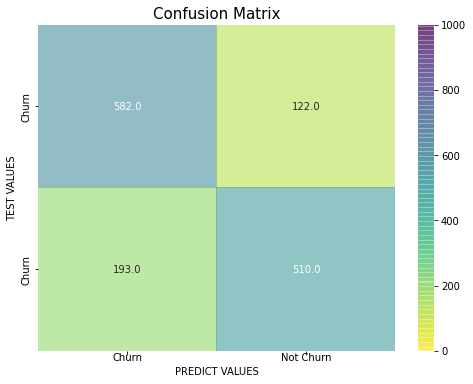

---------------------------------------------
T0 (True Not Churn): 582 (82.67%)
F0 (False Not Churn): 193 (27.45%)
T1 (True Churn): 510 (72.55%)
F1 (False Churn): 122 (17.33%)


In [39]:
recap_cm_smote_tomek = confusion_matrix_results(mlpc_smote_tomek)

### Conclusions MLPC_Resampled_Data(SMOTEtomek)
We can see that the **MLPC classifier** for **resampled data** is so far the **best algorithm** at predicting the clients that churned/exited the bank (higher recall value).

### 4_MLPC_Conclusions

#### 4.1_Cross Validation MLPC

In [40]:
def cross_validation_score (model):
    
    '''
    Function that caluclates the recall score
    '''
    recall_score = model[4]
    
    print(f'Cross Validation Score (Median): {recall_score} --> {round(np.median(recall_score)*100,2)}% recall')
    print(f'Numbers of Score Calculations: {len(recall_score)}')
    
    return round(np.median(recall_score)*100,2)

#### MLPC_not_incl_LDA

In [41]:
recall_score = cross_validation_score (mlpc)

Cross Validation Score (Median): [0.40983607 0.42896175 0.46321526 0.44686649 0.44141689] --> 44.14% recall
Numbers of Score Calculations: 5


#### MLPC_incl_LDA

In [42]:
recall_score_LDA = cross_validation_score (mlpc_LDA)

Cross Validation Score (Median): [0.43715847 0.49726776 0.49591281 0.41416894 0.46866485] --> 46.87% recall
Numbers of Score Calculations: 5


#### MLPC_Resampled_Data (SMOTEtomek)

In [43]:
recall_score_smote_tomek = cross_validation_score (mlpc_smote_tomek)

Cross Validation Score (Median): [0.76085241 0.76461295 0.74881517 0.75908373 0.75434439] --> 75.91% recall
Numbers of Score Calculations: 5


The best model for this **Neuronal Network Analysis** is the one that uses **resampled data**  because it gives us the **higer recall value** for lients that churned/exited the bank.

### 5_Recap

#### Parameters Grid Search

In [45]:
print(f'Grid Search')
print(150*'-')
print(f'NORMALIZED DATA: {gs_norm}')
print(f'NORMALIZED DATA+LDA: {gs_norm_LDA}')
print(f'RESAMPLED DATA (SMOTEtomek): {gs_norm_smote_tomek}')

Grid Search
------------------------------------------------------------------------------------------------------------------------------------------------------
NORMALIZED DATA: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 4, 'max_iter': 1500, 'random_state': 42, 'solver': 'adam'}
NORMALIZED DATA+LDA: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': 4, 'max_iter': 1500, 'random_state': 1, 'solver': 'adam'}
RESAMPLED DATA (SMOTEtomek): {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': 3, 'max_iter': 1500, 'random_state': 42, 'solver': 'adam'}


- **activation**: tanh
- **alpha**:0.1/0.001
- **hidden_layer_sizes**: 3/4
- **max_iter**: 1500
- **random_state**: 1/42
- **solver**: adam

#### Classification Reports

In [46]:
types = ['MLPC_not_incl_LDA','MLPC_incl_LDA','MLPC_Resampled_Data (SMOTEtomek)']
models = [mlpc[2], mlpc_LDA[2], mlpc_smote_tomek[2]]

for t, model in zip(types, models):
    print(f"MLPC model: {t}")
    print(model)
    print(60*'-')

MLPC model: MLPC_not_incl_LDA
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       796
         1.0       0.82      0.48      0.60       204

    accuracy                           0.87      1000
   macro avg       0.85      0.73      0.76      1000
weighted avg       0.87      0.87      0.86      1000

------------------------------------------------------------
MLPC model: MLPC_incl_LDA
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       796
         1.0       0.76      0.52      0.62       204

    accuracy                           0.87      1000
   macro avg       0.82      0.74      0.77      1000
weighted avg       0.86      0.87      0.86      1000

------------------------------------------------------------
MLPC model: MLPC_Resampled_Data (SMOTEtomek)
              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79       704
         1.0  

The first two models (**MLPC_not_incl_LDA** - **MLPC_not_incl_LDA**) give us similar results in terms of: precision, recall and f1_score. These neural networks are not able to recognize clients that exited the bank (recall: 48/52%-f1_score: 60-62%) but have an higher precision (


The model with **unbalance data** (**Resampled_Data (SMOTEtomek)**) is the best of all in terms of recall (this neural network is able to recognize well the clients that left the bank (recall: 73%), the precision is lower.